# Data Analyst Nanodegree

## Project 2 - Titanic Survival Exploration
Author: Linh Trieu

Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained.

This experiment does not include machine learning/predictive survivals, rather, it shows the different methods in data exploration using seaborn and mathplotlib; and data munging. 

Let's make a hypothesis that males are more likely to survive than females. This analysis will help answer the following questions:
    1. How many males/females were on the ship? Show graph.
    2. Among males and females, how many of them were surived?
    3. Taking Pclass into account, which class that makes passengers more likely to survive?
    4. If considered 16 years old as child, are children more likely to survive? How is child survival compared to the other two? Visualize it.
    5. Overall, are males or females are likely to survive?    
 

To begin working with the Titanic passenger data, I first imported the libraries, and loaded data into a pandas DataFrame.

In [7]:
#Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

#Load data into python
df_titanic = pd.read_csv("C:/Users/Linh/Documents/GitHub/Udacity-Data-Analysis-Nanodegree/Project 2/titanic-data.csv")

In [8]:
#Print the first 5 rows 
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#See the last 5 rows
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


From the head and tail, we have definition of variables: 

* **Survived:** Outcome of survival (0 = No; 1 = Yes)
* **Pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
* **Name:** Name of passenger
* **Sex:** Sex of the passenger
* **Age:** Age of the passenger (Some entries contain NaN)
* **SibSp:** Number of siblings and spouses of the passenger aboard
* **Parch:** Number of parents and children of the passenger aboard
* **Ticket:** Ticket number of the passenger
* **Fare:** Fare paid by the passenger
* **Cabin:** Cabin number of the passenger (Some entries contain NaN)
* **Embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [12]:
#Check data types of variables in the dataset
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* From the results, there are 891 rows for each column. 
* Missing values are in Age, Cabin, Embarked. 
* Objects are considered as string in pandas.

In [7]:
#Descriptive Statistics
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Mean age is 29.699 while youngest person is about 5 month old, oldest person is 80 years old.

#### Handle Missing Data in Age
The goal of dealing with missing data is to minimize bias, maximize use of available values, and obtain appropriate estimates of uncertainty. There are different issues that could arise when using different techniques to handle missing values. From previous result, we know that there are 177 missing values in Age (891-714). Apply mean imputation method is simple, however, the downside of this method is that it resulted a reduction in variability as values are imputed at the center of Age's distribution. Instead, below is an example of dropping missing values (dropna) when needed for further analysis. 

In [13]:
s1 = df_titanic.Age.dropna()
s1.head(10)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
Name: Age, dtype: float64

In [14]:
df_titanic.iloc[:,[0,5]].head(10)

,PassengerId,Age
0,1,22.0
1,2,38.0
2,3,26.0
3,4,35.0
4,5,35.0
5,6,NaN
6,7,54.0
7,8,2.0
8,9,27.0
9,10,14.0


Above tables indicate that missing value in 6th row got dropped.

#### Handle Missing Data in Cabin and Ticket Variables
* In Cabin, 687 out of 891 are missing. Thus, Cabin should be dropped.
* Ticket is string, considered as object in pandas, has number and text mixed. It seems to mess up the analysis while cannot provide values, thus, Ticket should also be dropped. 

In [15]:
#Drop Cabin variable
df_titanic_copy = df_titanic.drop(['Ticket', 'Cabin'], axis=1)

#take a look at cleaned data
df_titanic_copy.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [6]:
df_titanic_copy.dropna()
print

### Data Exploration

In [20]:
#Males and females breakdown 
sex = df_titanic.groupby(['Sex'])[['PassengerId']].count()
sex

,PassengerId
Sex,
female,314
male,577


* This answer the first question above as there are 314 females and 577 males among all passengers. 
* Take a look at Sex distribution

#### Sex Distribution

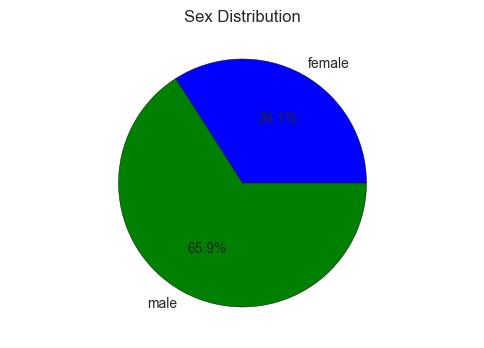

In [21]:
#Males/Females Pie Chart

s2=df_titanic.groupby(['Sex']).sum().stack()
temp=s2.unstack()
type(temp)
x_list = temp['PassengerId']
label_list = temp.index
plt.axis("equal") 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("Sex Distribution")
plt.show()

#### Survival Distribution

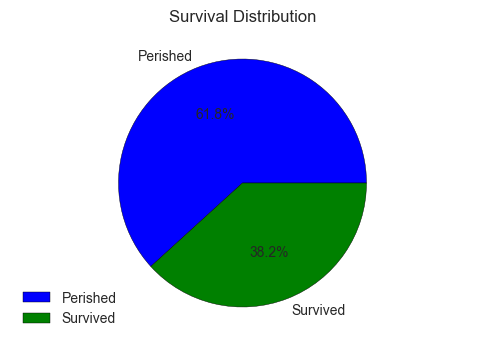

In [22]:
s3=df_titanic.groupby(['Survived']).sum().stack()
temp=s3.unstack()
type(temp)
x_list = temp['PassengerId']
labels = ['Perished', 'Survived']
plt.axis("equal") 
plt.pie(x_list,labels=labels,autopct="%1.1f%%") 
plt.title("Survival Distribution")
plt.legend(loc='best')
plt.show()

The chart shows that among 891 passengers, 38.2% of them survived.

#### Exploring Survival Rate with Respect to Sex

In [23]:
#Group by two columns and count and access PassengerId column
s4 = df_titanic.groupby(['Sex', 'Survived'])[['PassengerId']].count()
s4

PassengerId
Sex    Survived             
female 0                  81
       1                 233
male   0                 468
       1                 109

Now, we find out that among 233/314 females survived, while 109/577 males survived. 

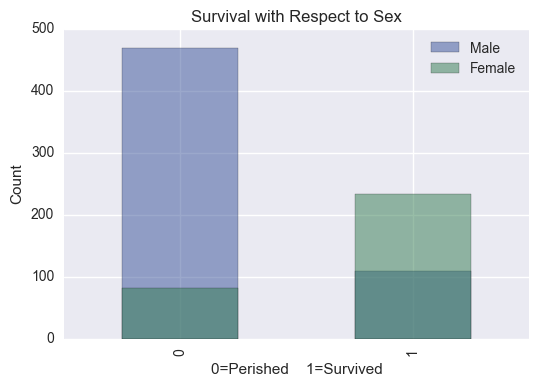

In [24]:
df_male = df_titanic.Survived[df_titanic.Sex == 'male'].value_counts().sort_index()
df_female = df_titanic.Survived[df_titanic.Sex == 'female'].value_counts().sort_index()
df_male.plot(kind='bar', color = "#385299", label='Male', alpha=0.5)
df_female.plot(kind='bar', color="#337c51",label='Female', alpha=0.5)
plt.xlabel('0=Perished    1=Survived')
plt.ylabel('Count')
plt.title("Survival with Respect to Sex"); plt.legend(loc='best')

From the graph, first bar indicates those who did not survive, denoted 0, while second bar indicates those who did survived. Females portion in first bar is less than males', while its portion in second bar is larger. This means that females are more likely to survive from this single exploration. 

#### Exploring Survival Rate Regarding to Sex and Pclass

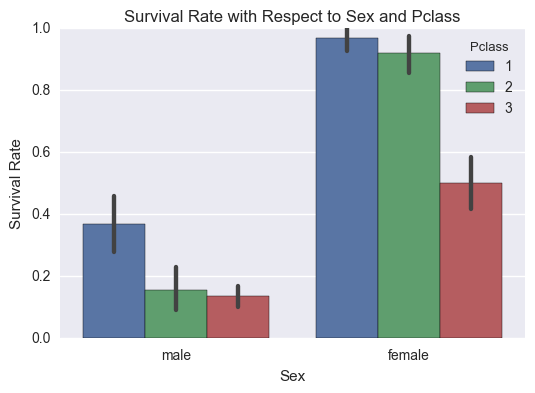

In [25]:
#Mean survied between variables using seaborn
s5 = sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df_titanic);
sns.plt.title('Survival Rate with Respect to Sex and Pclass')
s5.set(ylabel='Survival Rate')

* The graph shows that mean survived of females is more than males
* From a different standpoint, Pclass 1 and 2 has higher chance of survivals for males and females compared to Pclass 3. This could imply that first class might got rescued first, followed by second and third class, respectively. Another possibility is that it could depend on their assigned seats. Most likely, first class got to seat at a safer spot in case something happened. 

Let's explore three variables in different way, in which case, Pclass and Sex switched roles, where Pclass is in x axis.  

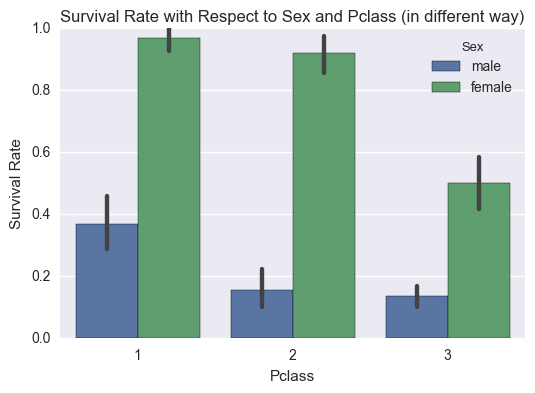

In [26]:
#in another way, do 3 classes in x
s6 = sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df_titanic);
sns.plt.title('Survival Rate with Respect to Sex and Pclass (in different way)')
s6.set(ylabel='Survival Rate')

Different view of mean survived between males/females and Pclass. From the graph, it is clearly that females regardless of Pclass, are more likely to survive than males. However, there might be a chance that more females were in first class. Let's take a look.

In [27]:
s7 = df_titanic.groupby(['Pclass', 'Sex'])[['PassengerId']].count()
s7

PassengerId
Pclass Sex                
1      female           94
       male            122
2      female           76
       male            108
3      female          144
       male            347

Now we can reject hypothesis making above, that there were not more females than males in first class.

#### Children Data Exploration

Assume children who are 16 or younger "Child" and adding new variable called "Person" for further exploration purpose.

In [28]:
#Set child if under 16
def set_child(passenger):
    Age, Sex = passenger
    if Age <= 16:
        return 'child'
    else:
        return Sex

In [29]:
#Add Person column applying set_child above
df_titanic['Person'] = df_titanic[['Age', 'Sex']].apply(set_child, axis=1)

In [30]:
df_titanic.iloc[:, [0,4,5,12]][0:10]

,PassengerId,Sex,Age,Person
0,1,male,22.0,male
1,2,female,38.0,female
2,3,female,26.0,female
3,4,female,35.0,female
4,5,male,35.0,male
5,6,male,NaN,male
6,7,male,54.0,male
7,8,male,2.0,child
8,9,female,27.0,female
9,10,female,14.0,child


In the new column added, Person, those who were under 16 are classified as child. 

In [33]:
#Count number of children
df_titanic['Person'].value_counts()

male      526
female    265
child     100
Name: Person, dtype: int64

Now there are 526 males, 265 female, and 100 children. This helps us explore the data set in more details.

Approaching the data using same method. 

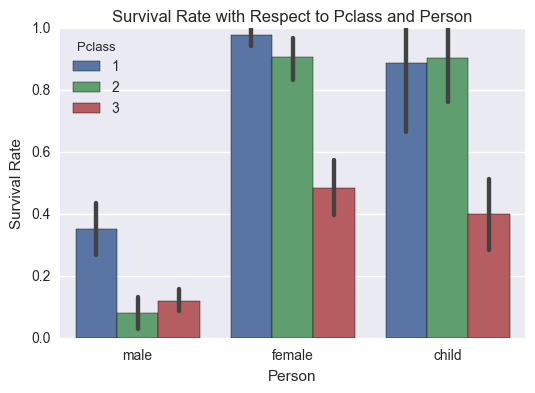

In [34]:
#create barplot 
s8 = sns.barplot(x="Person", y="Survived", hue="Pclass", data=df_titanic);
s8.set(ylabel='Survival Rate')
sns.plt.title("Survival Rate with Respect to Pclass and Person")

* Among three blocks, female and child have are more likely to survive.  
* Female and Child charts look similar even taking Pclass into account. This could mean that the children were more likely with their moms when the ship sunk. 

Let us take a look at Fare and Surivived variables through Boxplot

Fare
Survived                
0        mean  22.117887
         std   31.388207
1        mean  48.395408
         std   66.596998

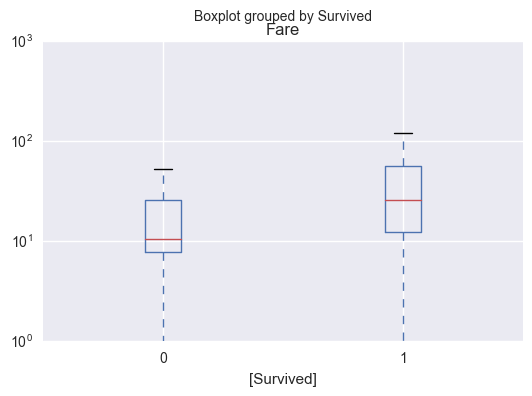

In [42]:
#Boxplot
df_titanic.boxplot(column=['Fare'], by=['Survived']).set_yscale('log')
pd.DataFrame(df_titanic.groupby(['Survived'])['Fare'].describe().loc[:,['mean', 'std']])

The plot shows that those who survived paid higher fare than those who did not. 

For two continuous variable such as Age and Fare, let us find out the how they are related.

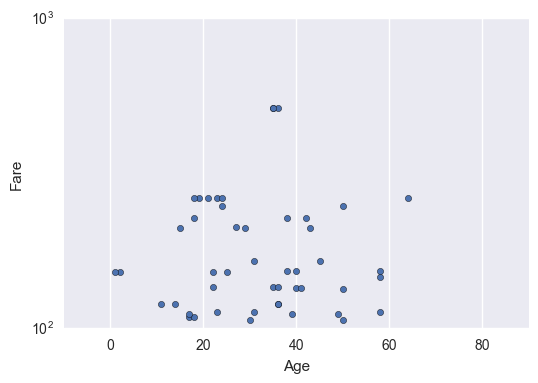

In [45]:
df_titanic.plot(kind='scatter', x='Age', y='Fare').set_yscale('log')

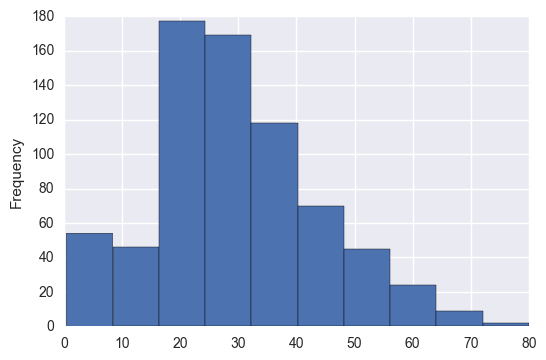

In [58]:
df_titanic['Age'].plot.hist(bins=10);

### Conclusion 
The hypothesis that males were more likely to survive than females is rejected. In other words, females were more likely to survive than males. 

Data munging is an important step in data analysis, therefore, it was investigated carefully. Filling missing values by mean of non-missing values is easy to implement, however, it resulted a reduction in variability due to the imputation at the center of the distribution. Thus, passengers with missing values will be removed in this case. Ticket and Cabin variables were dropped as there are significant number of missing values in Cabin, and mixed number and text in Ticket that did not seem to help with the analysis. 

There were different approaches applying to the Survival, Sex, Pclass, and Age variables. In most cases, females are more likely to survive than males regardless of what class they were. Interestingly, females and children had closed rate of survival, at higher compared to males. In addition, first class had higher chance to survive regardless of sex, followed by second and third class. Therefore, if one is a female in first class, she is most likely to survive compare to the rest of the passengers. 

As a note, this dataset was an extraction of full Titanic dataset that only contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. Since we do not have detailed information on how the dataset was extracted, this results biases. For example, 74.2% of females survived (233/314) in 891 dataset does not represent the survival rate for all females of 2224 passengers, which means that correlation does not imply causation. We need to perform t-test on sample and population datasets to check for significant differences. Readers should not assume the survival results from this dataset as one for the full dataset. The analysis focused on data wrangling and visualizing descriptive part of the dataset. Next analysis will be focusing on applying statistical methods to make survival predictions. 